In [1]:
import mrcfile

import numpy as np
import matplotlib.pyplot as plt

import fsc_utils as fsc

In [2]:
cmap_a = [plt.get_cmap('tab20c').colors[idx] for idx in [0, 4, 8, 12]]
cmap_b = [plt.get_cmap('tab20c').colors[idx] for idx in [2, 6, 10, 12]]

In [3]:
# You will need the 3-D volume and mask from: https://www.ebi.ac.uk/emdb/EMD-11657

map_file = ''
mask_file = ''

with mrcfile.open(map_file) as mrc:
    x = mrc.data
    voxel = mrc.voxel_size.x 
    mrc.close()

with mrcfile.open(mask_file) as mrc:
    mask = mrc.data
    mrc.close() 
    
x = np.sum(x * mask, axis=2)

r = x.shape[0] // 2

freq = fsc.get_radial_spatial_frequencies(x, voxel, mode='full')
split_freq = fsc.get_radial_spatial_frequencies(x, voxel, mode='split')

In [4]:
### Assumption 1 valid, Assumption 2 valid ###

np.random.seed(0)

snr = 15
B_signal = 100
B_noise = 0

y1, eps1 = fsc.generate_noisy_data(x, voxel, snr, B_signal, B_noise, return_noise=True)
y2, eps2 = fsc.generate_noisy_data(x, voxel, snr, B_signal, B_noise, return_noise=True)

fsc_y1y2 = fsc.two_image_frc(y1, y2, r)

sfsc = np.mean(fsc.single_image_frc(y1, r), axis=0)
sfsc_adjusted = 2*sfsc / (1 + sfsc)

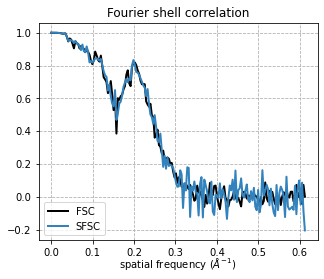

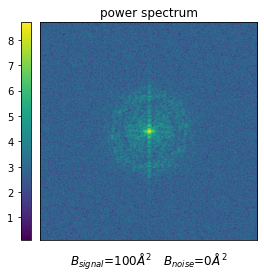

In [5]:
plt.figure(figsize=(5,4))
plt.plot(freq, fsc_y1y2, color='k', linestyle='-', linewidth=2, label='FSC')
plt.plot(freq, sfsc_adjusted, color=cmap_a[0], linewidth=2, label='SFSC')
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.grid(which='major', linestyle='--')
plt.xlabel('spatial frequency 'r'(${\AA}^{-1}$)', labelpad=-1.5)
plt.title('Fourier shell correlation')
plt.legend(loc='lower left')
# plt.savefig('')
plt.show()

plt.figure(figsize=(5,4))
plt.imshow(fsc.log_abs(fsc.ft2(y1)))
plt.colorbar(pad=0.03, location='left')
plt.title('power spectrum')
plt.xlabel(r'$B_{signal}$=100${\AA}^{2}$   $B_{noise}$=0${\AA}^{2}$', labelpad=11)
plt.xticks([])
plt.yticks([])
plt.rc('axes', labelsize=13)
plt.rc('axes', titlesize=12)
# plt.savefig('')
plt.show()

In [6]:
### Assumption 1 valid, Assumption 2 not valid ###

np.random.seed(0)

snr = 15
B_signal = 0
B_noise = 0

y1, eps1 = fsc.generate_noisy_data(x, voxel, snr, B_signal, B_noise, return_noise=True)
y2, eps2 = fsc.generate_noisy_data(x, voxel, snr, B_signal, B_noise, return_noise=True)

fsc_y1y2 = fsc.two_image_frc(y1, y2, r)

sfsc = np.mean(fsc.single_image_frc(y1, r), axis=0)
sfsc_adjusted = 2*sfsc / (1 + sfsc)

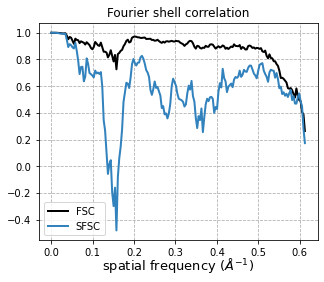

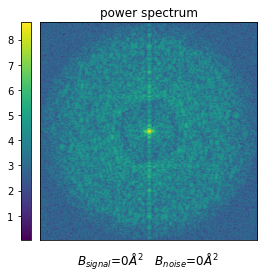

In [7]:
plt.figure(figsize=(5,4))
plt.plot(freq, fsc_y1y2, color='k', linestyle='-', linewidth=2, label='FSC')
plt.plot(freq, sfsc_adjusted, color=cmap_a[0], linewidth=2, label='SFSC')
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.grid(which='major', linestyle='--')
plt.xlabel('spatial frequency 'r'(${\AA}^{-1}$)', labelpad=-1.5)
plt.title('Fourier shell correlation')
plt.legend(loc='lower left')
# plt.savefig('')
plt.show()

plt.figure(figsize=(5,4))
plt.imshow(fsc.log_abs(fsc.ft2(y1)))
plt.colorbar(pad=0.03, location='left')
plt.title('power spectrum')
plt.xlabel(r'$B_{signal}$=0${\AA}^{2}$   $B_{noise}$=0${\AA}^{2}$', labelpad=11)
plt.xticks([])
plt.yticks([])
plt.rc('axes', labelsize=13)
plt.rc('axes', titlesize=12)
# plt.savefig('')
plt.show()

In [8]:
### Assumption 1 not valid, Assumption 2 valid ###

np.random.seed(0)

snr = 15
B_signal = 100
B_noise = 50

y1, eps1 = fsc.generate_noisy_data(x, voxel, snr, B_signal, B_noise, return_noise=True)
y2, eps2 = fsc.generate_noisy_data(x, voxel, snr, B_signal, B_noise, return_noise=True)

fsc_y1y2 = fsc.two_image_frc(y1, y2, r)

sfsc = np.mean(fsc.single_image_frc(y1, r), axis=0)
sfsc_adjusted = 2*sfsc / (1 + sfsc)

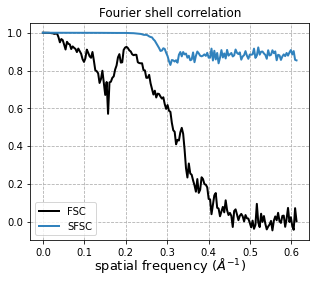

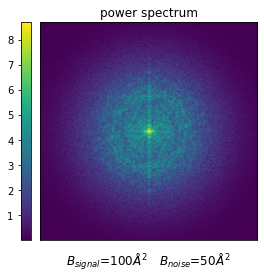

In [9]:
plt.figure(figsize=(5,4))
plt.plot(freq, fsc_y1y2, color='k', linestyle='-', linewidth=2, label='FSC')
plt.plot(freq, sfsc_adjusted, color=cmap_a[0], linewidth=2, label='SFSC')
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.grid(which='major', linestyle='--')
plt.xlabel('spatial frequency 'r'(${\AA}^{-1}$)', labelpad=-1.5)
plt.title('Fourier shell correlation')
plt.legend(loc='lower left')
# plt.savefig('')
plt.show()

plt.figure(figsize=(5,4))
plt.imshow(fsc.log_abs(fsc.ft2(y1)))
plt.colorbar(pad=0.03, location='left')
plt.title('power spectrum')
plt.xlabel(r'$B_{signal}$=100${\AA}^{2}$   $B_{noise}$=50${\AA}^{2}$', labelpad=11)
plt.xticks([])
plt.yticks([])
plt.rc('axes', labelsize=13)
plt.rc('axes', titlesize=12)
# plt.savefig('')
plt.show()

In [10]:
### Assumption 1 not valid, Assumption 2 not valid ###

np.random.seed(0)

snr = 15
B_signal = 20
B_noise = 10

y1, eps1 = fsc.generate_noisy_data(x, voxel, snr, B_signal, B_noise, return_noise=True)
y2, eps2 = fsc.generate_noisy_data(x, voxel, snr, B_signal, B_noise, return_noise=True)

fsc_y1y2 = fsc.two_image_frc(y1, y2, r)

sfsc = np.mean(fsc.single_image_frc(y1, r), axis=0)
sfsc_adjusted = 2*sfsc / (1 + sfsc)

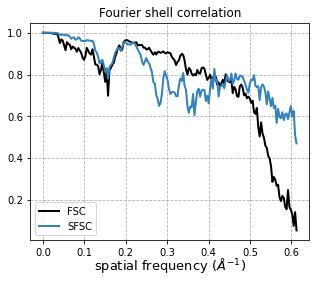

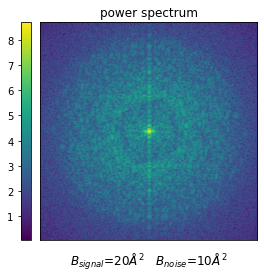

In [11]:
plt.figure(figsize=(5,4))
plt.plot(freq, fsc_y1y2, color='k', linestyle='-', linewidth=2, label='FSC')
plt.plot(freq, sfsc_adjusted, color=cmap_a[0], linewidth=2, label='SFSC')
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.grid(which='major', linestyle='--')
plt.xlabel('spatial frequency 'r'(${\AA}^{-1}$)', labelpad=-1.5)
plt.title('Fourier shell correlation')
plt.legend(loc='lower left')
# plt.savefig('')
plt.show()

plt.figure(figsize=(5,4))
plt.imshow(fsc.log_abs(fsc.ft2(y1)))
plt.colorbar(pad=0.03, location='left')
plt.title('power spectrum')
plt.xlabel(r'$B_{signal}$=20${\AA}^{2}$   $B_{noise}$=10${\AA}^{2}$', labelpad=11)
plt.xticks([])
plt.yticks([])
plt.rc('axes', labelsize=13)
plt.rc('axes', titlesize=12)
# plt.savefig('')
plt.show()